In [23]:
import praw
import pandas as pd
import time
from nltk.corpus import stopwords

In [24]:
reddit = praw.Reddit(client_id='nfgFdWocI1GFIQ',
                    client_secret='z_rsAXFyjZ3fELcJKucmHsQIB3jgHQ',
                    password='447account',
                    user_agent='447 Example',
                    username='Traditional-Ad-9640')
news = reddit.subreddit('News')


yesterdays_news = news.random()

topics_dict={"title":[],\
                "score":[],\
                "id":[],\
                "url":[],\
                "coms_num":[],\
                "author":[],\
                "upvotes":[],\
                }
x = 0

while x < 1500:
    x+=1
    time.sleep(.5)
    post = news.random()
    if isinstance(post, praw.models.reddit.submission.Submission) and post.created_utc > 1619022666:
        topics_dict["title"].append(post.title)
        topics_dict["score"].append(post.score)
        topics_dict["id"].append(post.id)
        topics_dict["url"].append(post.url)
        topics_dict["coms_num"].append(post.num_comments)
        topics_dict["author"].append(post.author)
        topics_dict["upvotes"].append(post.ups)

df = pd.DataFrame(data=topics_dict)
df

,title,score,id,url,coms_num,author,upvotes
0,Black man fatally shot by sheriff's deputies s...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160
1,Belgian ambassador to South Korea apologises a...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20
2,Relics seized from smugglers are returning to ...,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55
3,Russia to Withdraw Troops From Ukraine Border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209
4,Woman shackled by police while in labor settle...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211
...,...,...,...,...,...,...,...
1134,Former Bay City Rollers frontman Les McKeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13
1135,Syrian air-defence missile lands near Israeli ...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79
1136,Putin warns West of harsh response if it cross...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785
1137,Former Bay City Rollers frontman Les McKeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13


In [25]:
df['title']=df['title'].str.replace('[^A-Za-z0-9 ]','',regex=True)
df['word_count'] = df['title'].apply(lambda x: len(str(x).split(" ")))
df

,title,score,id,url,coms_num,author,upvotes,word_count
0,Black man fatally shot by sheriffs deputies se...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160,13
1,Belgian ambassador to South Korea apologises a...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20,11
2,Relics seized from smugglers are returning to ...,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55,8
3,Russia to Withdraw Troops From Ukraine Border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209,7
4,Woman shackled by police while in labor settle...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211,14
...,...,...,...,...,...,...,...,...
1134,Former Bay City Rollers frontman Les McKeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10
1135,Syrian airdefence missile lands near Israeli n...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79,8
1136,Putin warns West of harsh response if it cross...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785,12
1137,Former Bay City Rollers frontman Les McKeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10


In [26]:
df['title']=df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,title,score,id,url,coms_num,author,upvotes,word_count
0,black man fatally shot by sheriffs deputies se...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160,13
1,belgian ambassador to south korea apologises a...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20,11
2,relics seized from smugglers are returning to ...,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55,8
3,russia to withdraw troops from ukraine border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209,7
4,woman shackled by police while in labor settle...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211,14
...,...,...,...,...,...,...,...,...
1134,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10
1135,syrian airdefence missile lands near israeli n...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79,8
1136,putin warns west of harsh response if it cross...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785,12
1137,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10


In [27]:
stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

,title,score,id,url,coms_num,author,upvotes,word_count
0,black man fatally shot sheriffs deputies servi...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160,13
1,belgian ambassador south korea apologises wife...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20,11
2,relics seized smugglers returning afghanistan,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55,8
3,russia withdraw troops ukraine border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209,7
4,woman shackled police labor settles new york c...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211,14
...,...,...,...,...,...,...,...,...
1134,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10
1135,syrian airdefence missile lands near israeli n...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79,8
1136,putin warns west harsh response crosses russia...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785,12
1137,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10


In [28]:
#I dont think we should use the stemmer. it takes off a lot of trailing letters that should not be taken off

In [29]:
sorted = df.sort_values(by=['upvotes'], ascending=False)
new_df = sorted.drop_duplicates(subset=['title'])
top_30 = new_df.head(30)
top_30

,title,score,id,url,coms_num,author,upvotes,word_count
1049,virginia city fires police officer kyle ritten...,64895,mvkul2,https://apnews.com/article/police-philanthropy...,7411,Spin_Me,64895,9
1118,russia withdraw troops ukraine border,35145,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1825,Millie68,35145,7
934,woman finds tracking device car louisiana stat...,34051,mvsb7s,https://www.wbrz.com/news/woman-finds-tracking...,2025,DICK-FUCK-PUSSY-SUCK,34051,12
503,man hit 4000 bill yearlong jail stay charges l...,29192,mvq3wk,https://www.wkyt.com/2021/04/21/man-hit-with-4...,1561,crosleyxj,29192,15
1127,derek chauvin held solitary confinement 23 hou...,27083,mvkejd,https://www.nytimes.com/2021/04/21/us/derek-ch...,4383,3dprinteddildo,27083,13
1018,scientific paper claiming smokers less likely ...,15661,mvyypl,https://www.theguardian.com/science/2021/apr/2...,636,Faruyazy,15661,14
906,spain give pets rights humans breakthrough hom...,14051,mvrd7y,https://inews.co.uk/news/spain-pets-human-righ...,496,TVaddictpanda,14051,15
566,neonazi leader arrested arizona aggravated ass...,10666,mvq2l4,https://www.reuters.com/world/us/neo-nazi-lead...,509,DissentingJay,10666,8
1016,suspending male student wearing nail polish te...,8176,mvpoud,https://www.nbcnews.com/feature/nbc-out/suspen...,458,sh0tgunben,8176,12
1074,italian hospital employee accused skipping wor...,5398,mvp8ze,https://www.bbc.com/news/world-europe-56822571,413,Piranha_ChuckNorris,5398,10


In [30]:
corpus = ' '.join(top_30['title'])
corp = open("news_words.txt","w")
corp.writelines(corpus)
corp.close()

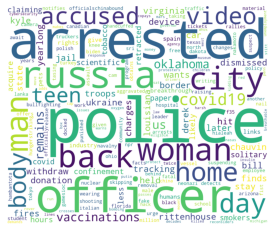

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

file_content=open("news_words.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()